In [1]:
#Necessary imports
import numpy
import pandas as pd
import pylab
import LightCurveSimulator
import scipy
from scipy import interpolate
from scipy.optimize import curve_fit
#minimize the function 
from scipy.optimize import minimize # import the minimization function
#We will be testing these fits on the lightcurve you know from the LightCurveSimu notebook.
lc = LightCurveSimulator.ShortTransit()
lc.add_noise(sn=500)

flux = lc.getdata()[1]
time = lc.getdata()[0]
error =lc.getdata()[2]

In [2]:
#FUNCTION USING DATFRAMES
df = pd.DataFrame({'Time':time, 'Flux':flux, 'Uncertainty':error})
def lightcurve1(transit_start, transit_end):
    model_flux = []
    coeffs = numpy.polyfit(time,flux,deg=10)
    poly = numpy.poly1d(coeffs)
    
    for value in df['Time']:
        if (value < transit_end) and (value > transit_start):
            model_flux.append(poly(value))
        else: 
            model_flux.append(1)
    df['Model Flux']= model_flux
    
    pylab.figure(figsize=(12,6))
    pylab.errorbar(df['Time'], df['Flux'],yerr=df['Uncertainty'])
    pylab.plot(df['Time'],df['Model Flux'],lw=5)
    #return(df)

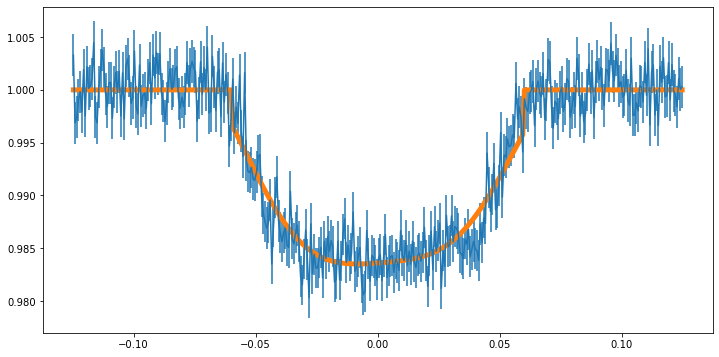

In [3]:
lightcurve1(-0.06, 0.06)

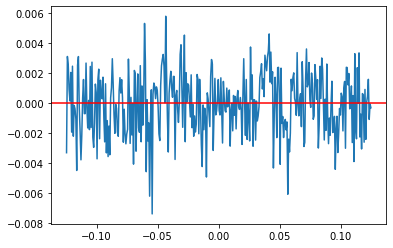

In [4]:
#RESIDUALS 
pylab.plot(df['Time'], (df['Model Flux']-df['Flux']))
pylab.axhline(c='r')

In [11]:
#FUNCTION USING NP ARRAYS 
def lightcurve2(t, transit_start, transit_end):
    model_f = numpy.zeros(360)
    coeffs = numpy.polyfit(time,flux,deg=4)
    poly = numpy.poly1d(coeffs)
    #ones = numpy.ones([])
    
    for i in range(0,len(t)):
        if (t[i] < transit_end) and (t[i] > transit_start):
            model_f[i] = poly(t[i])
        else: 
            model_f[i] = 1
    model_f
    pylab.figure(figsize=(12,6))
    pylab.errorbar(time, flux,yerr=error)
    pylab.plot(time,model_f,lw=5)

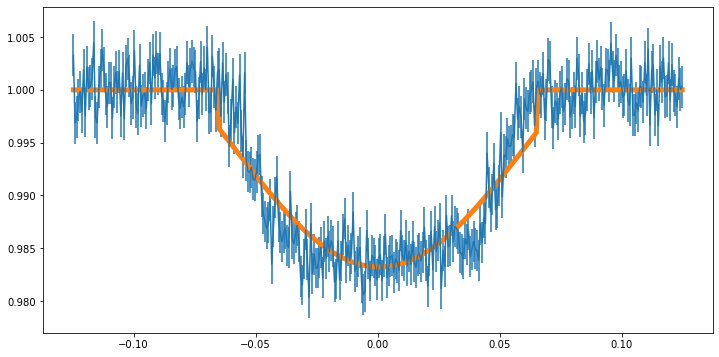

In [12]:
lightcurve2(time, -0.065, 0.065)

In [7]:
#FUNCTION CAN INPUT SINGLE TIME OR ARRAY TIME 
coeffs = numpy.polyfit(time,flux,deg=10)
poly = numpy.poly1d(coeffs)

def lightcurve3(t, transit_start):
    #ones = numpy.ones([])
    
    baseflux = 1
    transitflux = poly(t)
    
    return numpy.where(((t>transit_start) & (t< 0.06)), transitflux, baseflux)

In [8]:
lightcurve3(0.01, -0.06)

array(0.98381947)

In [9]:
guess = [-0.05]

In [10]:
scipy.optimize.minimize(lightcurve3(transit_start=-0.05, t=0.01), guess, method='Nelder-Mead')

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
def chisquared(y, error, ymodel):
    return numpy.sum((y-ymodel)**2/error**2)

In [ ]:
chi = chisquared(y = df['Flux'],ymodel = df['Model Flux'], error = df['Uncertainty'])
chi

In [ ]:
#reduced chi squared 
chi_red = chi/(len(df)-6-1)
print(chi_red)

In [ ]:
scipy.optimize.minimize(chi_squared, 